<a href="https://colab.research.google.com/github/sudarshan0894/GWM-Data-Science/blob/main/STOCK_MARKET_PREDICTION_AND_FORECASTING_USING_STACKED_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import math
warnings.filterwarnings('ignore')

In [ ]:
#Load the historical stock price dataset
stock_data = pd.read_csv('stock_data.csv')
stock_data

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA


In [ ]:
missing_values = stock_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [ ]:

# Handle missing values (if any)
# You can choose to drop rows with missing values or fill them with a specific value.
# For example, you can drop rows with missing values like this:
stock_data.dropna(inplace=True)

In [ ]:
# Split the dataset into training and testing sets
split_index = int(len(stock_data) * 0.8)


In [ ]:
train_data = stock_data[:split_index]
test_data = stock_data[split_index:]

In [ ]:
# Showing the first 5 rows of the dataset
stock_data.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [ ]:
#showing the dimensions of the dataset
stock_data.shape

(3019, 7)

In [ ]:
# showing columns of the dataset
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [ ]:
# showing information about the dataset
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [ ]:
# Descriptive Statistics Analysis of Data
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,2.842648e+01,1.325724e+01,9.10,1.617500e+01,27.18,3.665500e+01,7.302000e+01
High,3019.0,2.876653e+01,1.335669e+01,9.48,1.638500e+01,27.49,3.703500e+01,7.325000e+01
Low,3019.0,2.806656e+01,1.315733e+01,8.94,1.597000e+01,26.82,3.630500e+01,7.246000e+01
Close,3019.0,2.841273e+01,1.325816e+01,8.95,1.613000e+01,27.10,3.663500e+01,7.293000e+01
Volume,3019.0,2.158391e+07,1.926231e+07,1939061.00,1.248025e+07,17321301.00,2.512757e+07,4.382317e+08


**Data Preprocessing and Cleaning**




In [ ]:
# checking for Data Types
stock_data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [ ]:
# converion of Object to Datetime data type
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# checking for data types
stock_data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

In [ ]:
# checking foer duplicated values
stock_data.duplicated().sum()

0

In [ ]:
# Sorting the Date of Date Column
stock_data = stock_data.sort_values('Date')
stock_data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [ ]:
print(stock_data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')


**Data Visualization**

In [ ]:
timesteps = 10  # Number of time steps in your sequence
features = 1    # Number of features for each time step

# Define the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(timesteps, features)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



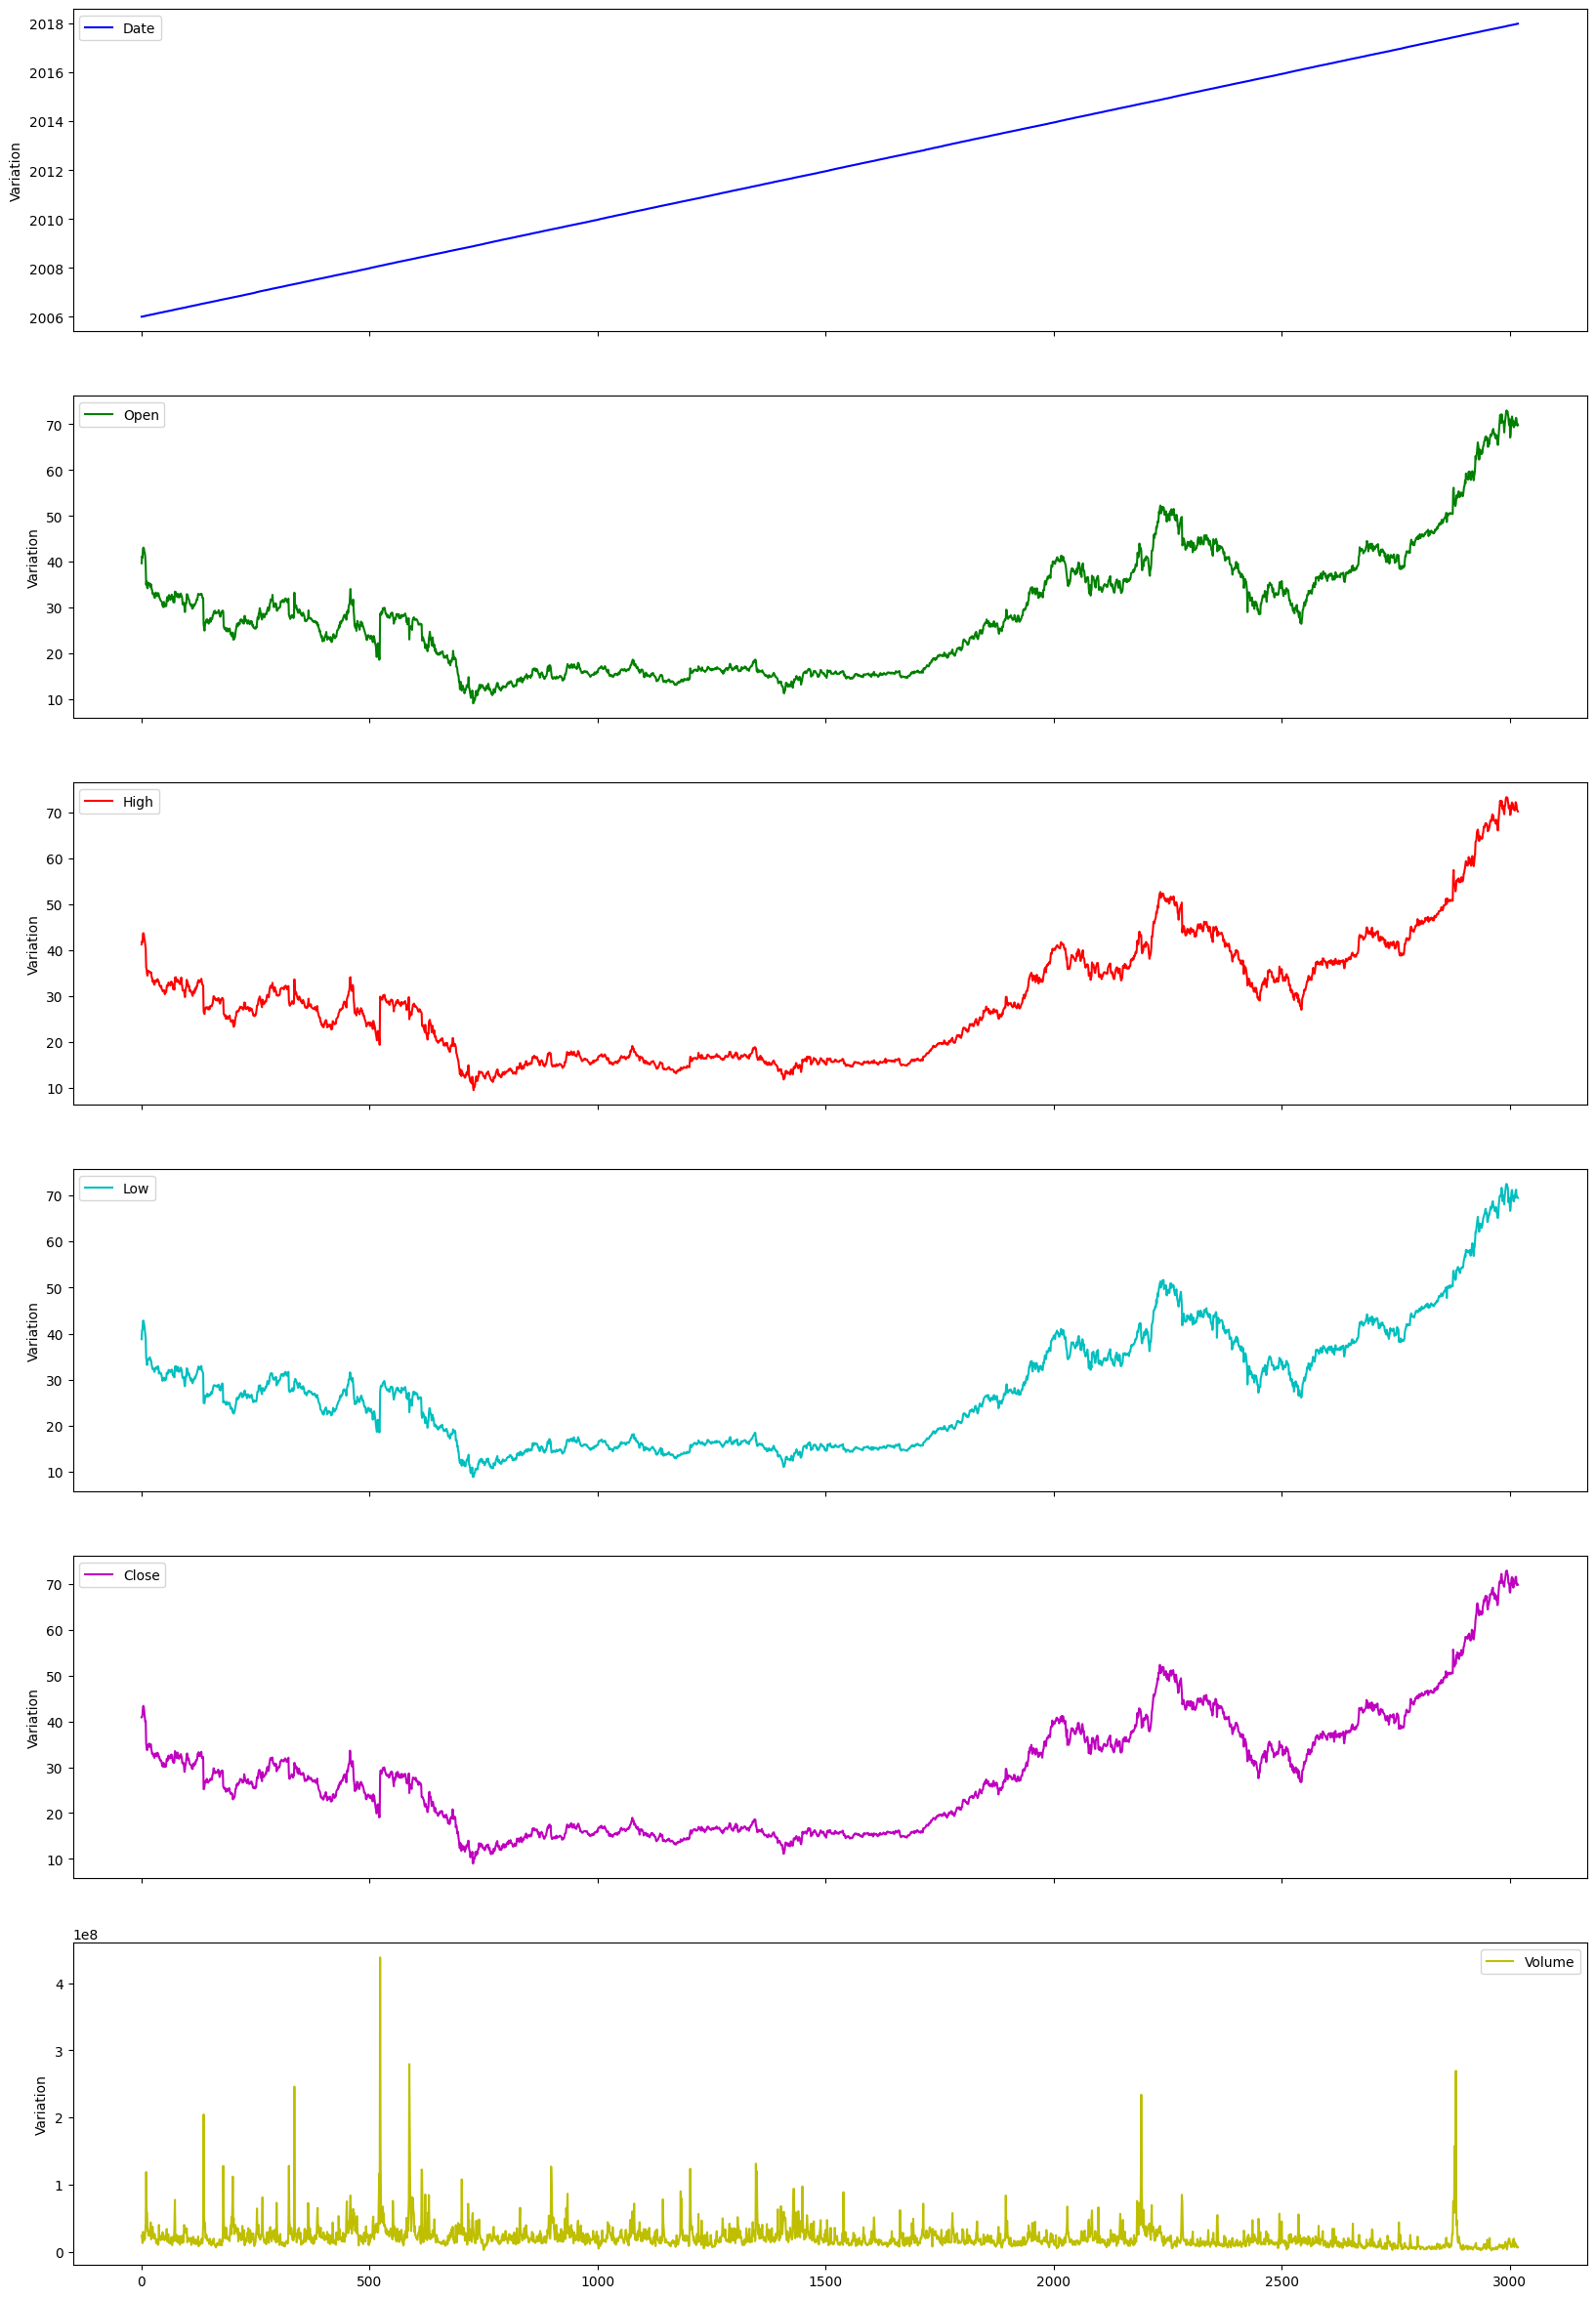

In [109]:
import matplotlib.pyplot as plt

cols_plot = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create subplots
axes = stock_data [cols_plot].plot(alpha=1, figsize=(20, 30), subplots=True, color=colors)

for ax in axes:
    ax.set_ylabel('Variation')

# Show the subplots
plt.show()



**Plotting Correlation Plot**

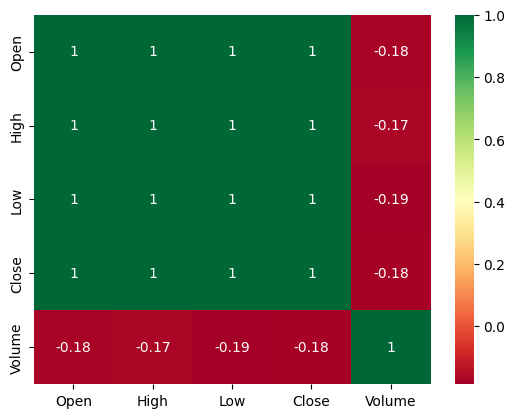

In [ ]:
sns.heatmap(stock_data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

**MinMaxScaler**

From the original dataset, we can tell that each of our target value are in close proximity to one another. So, we will use MinMaxScaler to scale down all the target variables in the range of (0, 1) for the ease of computation.

In [ ]:
stock_data_close = stock_data.reset_index()['Close']
stock_data_close.head()
scaler = MinMaxScaler(feature_range = (0, 1))
stock_data_close = scaler.fit_transform(np.array(stock_data_close).reshape(-1, 1))
stock_data_close

array([[0.4995311 ],
       [0.5004689 ],
       [0.50922163],
       ...,
       [0.95514223],
       [0.95139106],
       [0.95185996]])

**Train Test Split**

In [ ]:
train_size = int(len(stock_data_close)*0.75)
test_size = len(stock_data_close) - train_size
train, test = stock_data_close[0 : train_size, :], stock_data_close[train_size : len(stock_data_close), :1]

In [ ]:
print(train_size)
print(test_size)

2264
755


**conversion of an array of values into a dataset matrix**

In [ ]:
def create_matrix(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        train_X.append(a)
        train_Y.append(dataset[i+time_step,0])
    return np.array(train_X), np.array(train_Y)

In [ ]:

step=100
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2163, 100) (2163,)
(654, 100) (654,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Create the Stacked LSTM model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create the Sequential model
model = Sequential()

# Add the first LSTM layer with return_sequences=True to feed the next LSTM layer a sequence
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))

# Add the second LSTM layer with return_sequences=True
model.add(LSTM(50, return_sequences=True))

# Add the third LSTM layer
model.add(LSTM(50))

# Add the Dense output layer with one unit for regression
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=64, verbose=1, shuffle=True)

Epoch 1/100
31/31 [==============================] - 12s 212ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 2/100
31/31 [==============================] - 6s 181ms/step - loss: 6.5905e-04 - val_loss: 0.0012
Epoch 3/100
31/31 [==============================] - 6s 193ms/step - loss: 5.0513e-04 - val_loss: 0.0014
Epoch 4/100
31/31 [==============================] - 6s 195ms/step - loss: 4.8823e-04 - val_loss: 0.0010
Epoch 5/100
31/31 [==============================] - 5s 176ms/step - loss: 4.7965e-04 - val_loss: 9.7847e-04
Epoch 6/100
31/31 [==============================] - 7s 216ms/step - loss: 4.8374e-04 - val_loss: 0.0011
Epoch 7/100
31/31 [==============================] - 5s 176ms/step - loss: 4.5026e-04 - val_loss: 9.9762e-04
Epoch 8/100
31/31 [==============================] - 7s 218ms/step - loss: 4.0284e-04 - val_loss: 8.1282e-04
Epoch 9/100
31/31 [==============================] - 5s 176ms/step - loss: 3.8934e-04 - val_loss: 7.8617e-04
Epoch 10/100
31/31 [======================

In [ ]:
# Evaluate the model on the testing dataset
loss = model.evaluate(X_test, y_test)

# Make predictions using the trained model
predictions = model.predict(X_test)


21/21 [==============================] - 2s 36ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error

# Assuming you have y_train and train_predict defined elsewhere in your code
y_train = [1, 2, 3, 4, 5]  # Example y_train data
train_predict = [1.1, 1.9, 2.8, 3.7, 4.9]  # Example predicted values

# Calculate the mean squared error and then take the square root
mse = mean_squared_error(y_train, train_predict)
rmse = math.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.17888543819998315


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.17888543819998315